<a href="https://colab.research.google.com/github/kkellygu/ds3001labs/blob/main/04_hedonic_pricing_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


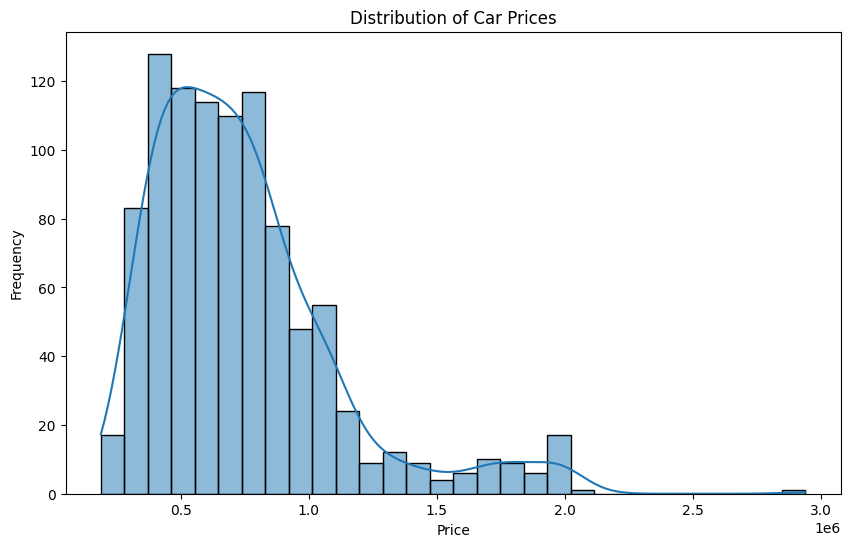

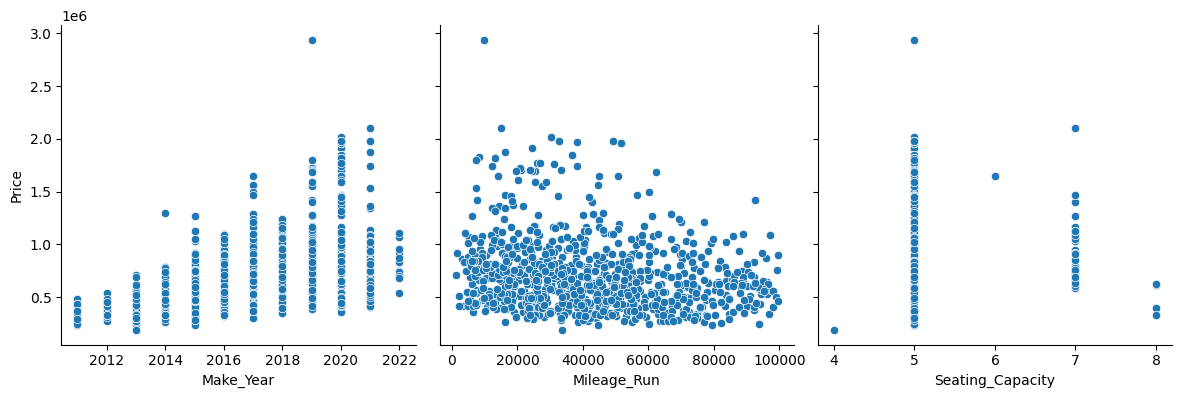

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cars_hw.csv')
df.head()
df.info()

plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

sns.pairplot(df, x_vars=['Make_Year','Mileage_Run','Seating_Capacity'], y_vars='Price', height=4)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Color'] = label_encoder.fit_transform(df['Color'])
df['Body_Type'] = label_encoder.fit_transform(df['Body_Type'])
df['No_of_Owners'] = label_encoder.fit_transform(df['No_of_Owners'])
df['No_of_Owners'] = label_encoder.fit_transform(df['No_of_Owners'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Transmission_Type'] = label_encoder.fit_transform(df['Transmission_Type'])

df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,15,2017,12,3,44611,0,5,0,3,0,657000
1,2,4,2016,11,0,20305,0,5,1,1,1,682000
2,3,3,2019,13,4,29540,1,5,1,1,1,793000
3,4,11,2017,3,1,35680,0,5,1,1,1,414000
4,5,4,2017,9,1,25126,0,5,1,1,1,515000


In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}, Test Set size: {X_test.shape[0]}')

Training set size: 780, Test Set size: 196


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

train_preds_simple = simple_model.predict(X_train)
test_preds_simple = simple_model.predict(X_test)

train_rmse_simple = mean_squared_error(y_train, train_preds_simple, squared=False)
test_rmse_simple = mean_squared_error(y_test, test_preds_simple, squared=False)
train_r2_simple = r2_score(y_train, train_preds_simple)
test_r2_simple = r2_score(y_test, test_preds_simple)

print(f'Simple Model - Train RMSE: {train_rmse_simple}, Test RMSE: {test_rmse_simple}')
print(f'Simple Model - Train R^2: {train_r2_simple}, Test R^2: {test_r2_simple}')

Simple Model - Train RMSE: 213919.88460434251, Test RMSE: 194016.33934278457
Simple Model - Train R^2: 0.6721484358136821, Test R^2: 0.6718062552816499


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

complex_model = LinearRegression()
complex_model.fit(X_poly_train, y_train)

train_preds_complex = complex_model.predict(X_poly_train)
test_preds_complex = complex_model.predict(X_poly_test)

train_rmse_complex = mean_squared_error(y_train, train_preds_complex, squared=False)
test_rmse_complex = mean_squared_error(y_test, test_preds_complex, squared=False)
train_r2_complex = r2_score(y_train, train_preds_complex)
test_r2_complex = r2_score(y_test, test_preds_complex)

print(f'Complex Model - Train RMSE: {train_rmse_complex}, Test RMSE: {test_rmse_complex}')
print(f'Complex Model - Train R^2: {train_r2_complex}, Test R^2: {test_r2_complex}')

Complex Model - Train RMSE: 169288.84864776913, Test RMSE: 160778.03137021785
Complex Model - Train R^2: 0.7946798128852318, Test R^2: 0.7746242939250905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5) The complex model significantly outperforms the simple model in both RMSE and R^2, indicating a better fit to the data. Specifically, the complex model achieves a lower RMSE compared ot the simple model, suggesting more accurate predictions. Additionally, the complex model's R^2 values are higher than those of the simple model, meaning it explains a greater proportion of the variance in car prices. These improvements suggest that the transformations and interactions included in the complex model effectively capture the underlying relationships between features and the target variable, although it is important to monitor for potential overfitting.

6. Through this assignment, I learned the importance of model selection, and that the first model may not be the best fit for the data. It is best to play and modify the original model to generate results that are best in terms of performance, while avoiding overfitting.